# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [12]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy
%matplotlib inline 

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 575


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url =url+"&q="+city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vernon
Processing Record 2 of Set 1 | blackmans bay
Processing Record 3 of Set 1 | hermanus
Processing Record 4 of Set 1 | grytviken
Processing Record 5 of Set 1 | palmas
Processing Record 6 of Set 1 | klyuchi
Processing Record 7 of Set 1 | lobbes
Processing Record 8 of Set 1 | iqaluit
Processing Record 9 of Set 1 | lebu
Processing Record 10 of Set 1 | puerto natales
Processing Record 11 of Set 1 | aasiaat
Processing Record 12 of Set 1 | kapuskasing
Processing Record 13 of Set 1 | khandyga
Processing Record 14 of Set 1 | talnakh
Processing Record 15 of Set 1 | posto fiscal rolim de moura
Processing Record 16 of Set 1 | waitangi
Processing Record 17 of Set 1 | la'ie
Processing Record 18 of Set 1 | tatui
Processing Record 19 of Set 1 | nay pyi taw
Processing Record 20 of Set 1 | badger
Processing Record 21 of Set 1 | chonchi
Processing Record 22 of Set 1 | flying fish cove
Processing Record 23 of S

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          552
Lat           552
Lng           552
Max Temp      552
Humidity      552
Cloudiness    552
Wind Speed    552
Country       552
Date          552
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,vernon,50.2581,-119.2691,2.64,100,100,0.51,CA,1707254254
1,blackmans bay,-43.0167,147.3167,14.07,74,97,2.61,AU,1707254396
2,hermanus,-34.4187,19.2345,19.89,79,47,6.87,ZA,1707254234
3,grytviken,-54.2811,-36.5092,9.82,57,2,1.92,GS,1707254194
4,palmas,-10.2128,-48.3603,27.93,78,20,1.54,BR,1707254082


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vernon,50.2581,-119.2691,2.64,100,100,0.51,CA,1707254254
1,blackmans bay,-43.0167,147.3167,14.07,74,97,2.61,AU,1707254396
2,hermanus,-34.4187,19.2345,19.89,79,47,6.87,ZA,1707254234
3,grytviken,-54.2811,-36.5092,9.82,57,2,1.92,GS,1707254194
4,palmas,-10.2128,-48.3603,27.93,78,20,1.54,BR,1707254082


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

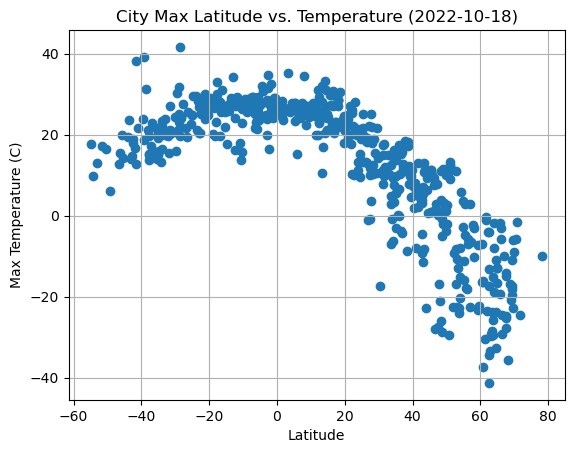

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2022-10-18)")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

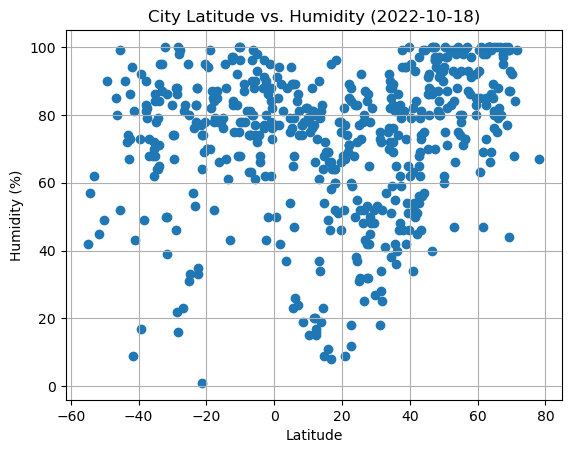

In [13]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

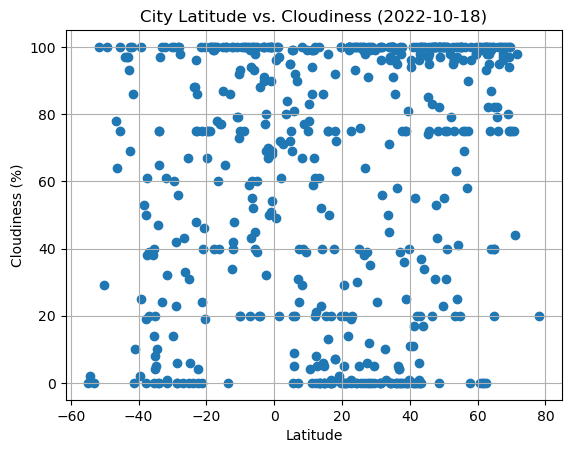

In [25]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

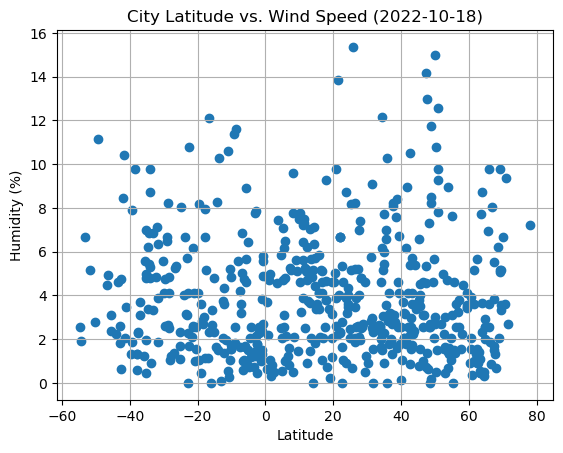

In [27]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [20]:
# Define a function to create Linear Regression plots
def graph_regression(x_values,y_values,my_title, y_label, location):
    plt.scatter(x_values,y_values, marker="o")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
   
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,location,fontsize=15,color="red")
  
    print(f"The r-squared is: {rvalue**2}")
    
    # Incorporate the other graph properties
    plt.title(my_title)
    plt.ylabel(y_label)
    plt.xlabel("Latitude")
    plt.grid(True)
    
    # Save the figure
    # plt.savefig("output_data/Fig2.png")
    
    # Show plot
    plt.show()

In [17]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df= city_data_df.loc[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vernon,50.2581,-119.2691,2.64,100,100,0.51,CA,1707254254
5,klyuchi,52.2667,79.1667,-9.20,83,79,4.99,RU,1707254223
6,lobbes,50.3529,4.2666,10.50,75,75,10.80,BE,1707254396
7,iqaluit,63.7506,-68.5145,-15.15,66,75,7.72,CA,1707254207
10,aasiaat,68.7098,-52.8699,-16.87,77,100,6.21,GL,1707254240


In [18]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df= city_data_df.loc[city_data_df["Lat"]<=0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,blackmans bay,-43.0167,147.3167,14.07,74,97,2.61,AU,1707254396
2,hermanus,-34.4187,19.2345,19.89,79,47,6.87,ZA,1707254234
3,grytviken,-54.2811,-36.5092,9.82,57,2,1.92,GS,1707254194
4,palmas,-10.2128,-48.3603,27.93,78,20,1.54,BR,1707254082
8,lebu,-37.6167,-73.6500,19.76,82,61,2.35,CL,1707254205


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7494251164819754


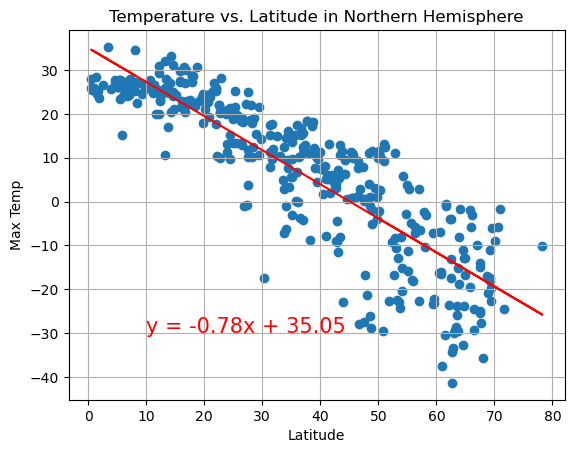

In [28]:
# Linear regression on Northern Hemisphere
x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Max Temp"]

graph_regression(x_values,y_values,"Temperature vs. Latitude in Northern Hemisphere", "Max Temp", (10,-30))

The r-squared is: 0.3000107899912173


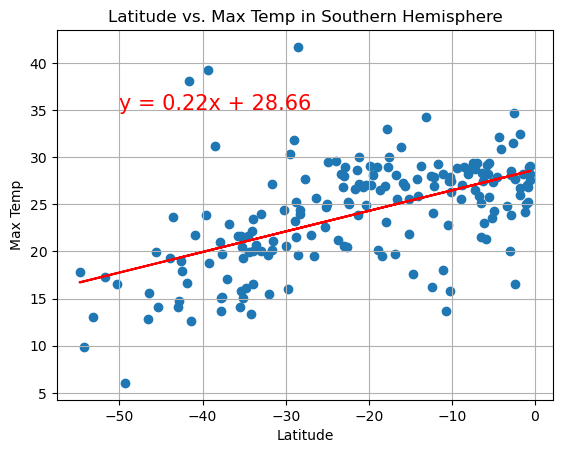

In [29]:
# Linear regression on Southern Hemisphere
x_values=southern_hemi_df["Lat"]
y_values=southern_hemi_df["Max Temp"]

graph_regression(x_values,y_values,"Latitude vs. Max Temp in Southern Hemisphere", "Max Temp", (-50,35))

**Discussion about the linear relationship:** Temperature seems to have a direct correlation with latitude. As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). The southern hemisphere tends to be warmer this time of year than the northern hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.18579917809534802


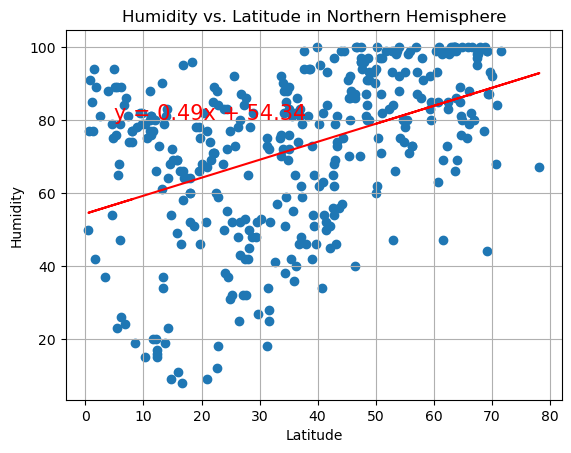

In [54]:
# Northern Hemisphere
x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Humidity"]

graph_regression(x_values,y_values,"Humidity vs. Latitude in Northern Hemisphere", "Humidity", (5,80))

The r-squared is: 0.04877670513308288


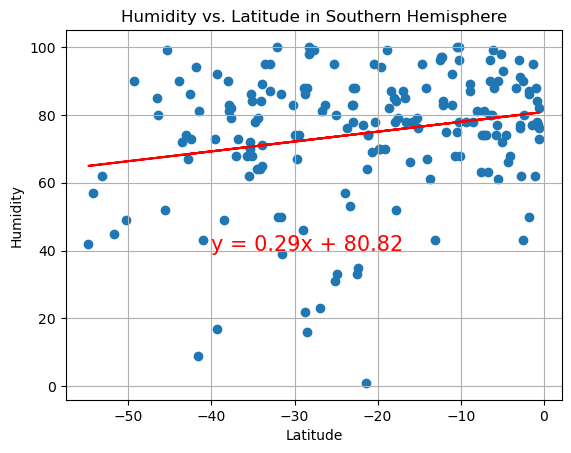

In [53]:
# Southern Hemisphere
x_values=southern_hemi_df["Lat"]
y_values=southern_hemi_df["Humidity"]

graph_regression(x_values,y_values,"Humidity vs. Latitude in Southern Hemisphere", "Humidity", (-40,40))

**Discussion about the linear relationship:** 
There is a moderate positive correlation between latitude and humidity for northern hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.07893107389316152


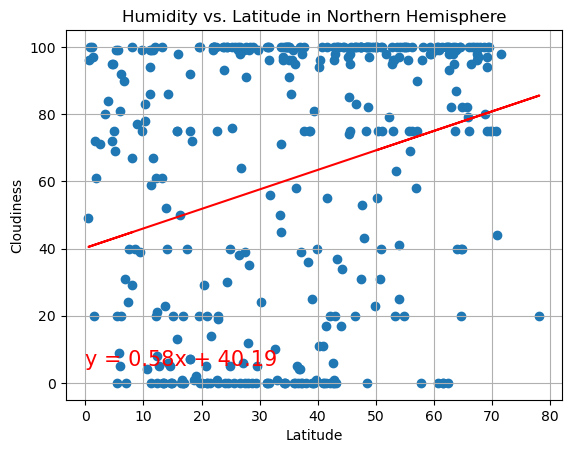

In [44]:
# Northern Hemisphere
x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Cloudiness"]

graph_regression(x_values,y_values,"Humidity vs. Latitude in Northern Hemisphere", "Cloudiness", (0,5))

The r-squared is: 0.09675490532336961


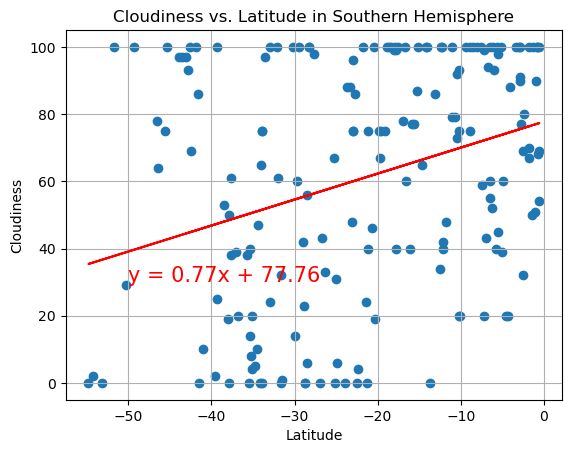

In [46]:
# Southern Hemisphere
x_values=southern_hemi_df["Lat"]
y_values=southern_hemi_df["Cloudiness"]

graph_regression(x_values,y_values,"Cloudiness vs. Latitude in Southern Hemisphere", "Cloudiness", (-50,30))

**Discussion about the linear relationship:** There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0 and 100% cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.0032365862004204386


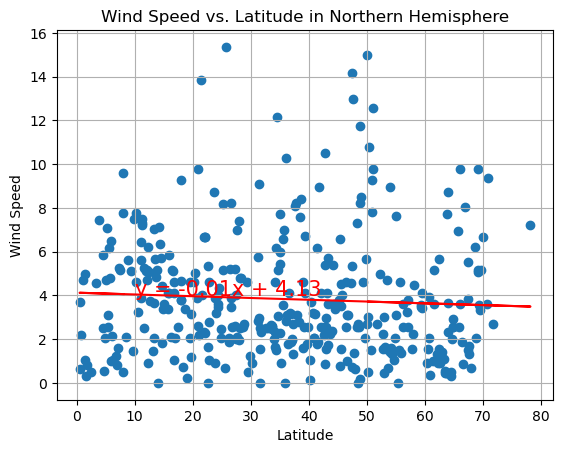

In [37]:
# Northern Hemisphere
x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Wind Speed"]

graph_regression(x_values,y_values,"Wind Speed vs. Latitude in Northern Hemisphere", "Wind Speed", (10,4))

The r-squared is: 0.022953900915220427


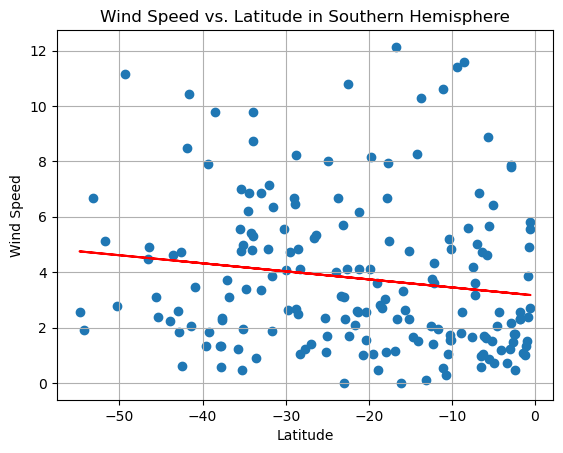

In [49]:
# Southern Hemisphere
x_values=southern_hemi_df["Lat"]
y_values=southern_hemi_df["Wind Speed"]

graph_regression(x_values,y_values,"Wind Speed vs. Latitude in Southern Hemisphere", "Wind Speed", (10,5))

**Discussion about the linear relationship:** There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.